# Foreground finder
Using nbextensions is nice: https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/install.html
`conda install -c conda-forge jupyter_contrib_nbextensions`

In [3]:
import os
import sys
import numpy as np
import pathlib
import shutil
import importlib
from tqdm import tqdm
import copy

if os.getcwd().endswith('inspects'):
    os.chdir("..")
    print(f"CWD changed to: {os.getcwd()}.")

from inspects.utils import *
add_root_to_path(steps_up=2)

## Setup paths

In [4]:
import vendor
import cv2

input_root = pick_path([r"tests\input"])
office_dataset = pick_path([r"tests\input\office"])

## Prepare samples

In [5]:
import vendor.SEP.sep.loaders.images as loaders
import vendor.SEP.sep._commons.visuals as visuals
importlib.reload(loaders)

def annotatation_matcher(image_path : pathlib.Path):
    image_name = image_path.stem.replace("in", "gt") + ".png"
    return str(image_path.parent.parent / "masks" / image_name)

office_loader = loaders.ImagesLoader(data_root=os.path.join(office_dataset, "images"), 
                                     annotation_for_image_finder=annotatation_matcher,
                                     verbose=0)

print(office_loader)
print("Data count:", len(office_loader))

ImageLoader for: tests\input\office\images
Data count: 12


image_sample <class 'imageio.core.util.Array'>
Shape: (240, 360, 3), Type: uint8, Min-max: (0, 255), Mean: 96.71096450617284
gt_sample <class 'imageio.core.util.Array'>
Shape: (240, 360), Type: uint8, Min-max: (0, 255), Mean: 10.690914351851852


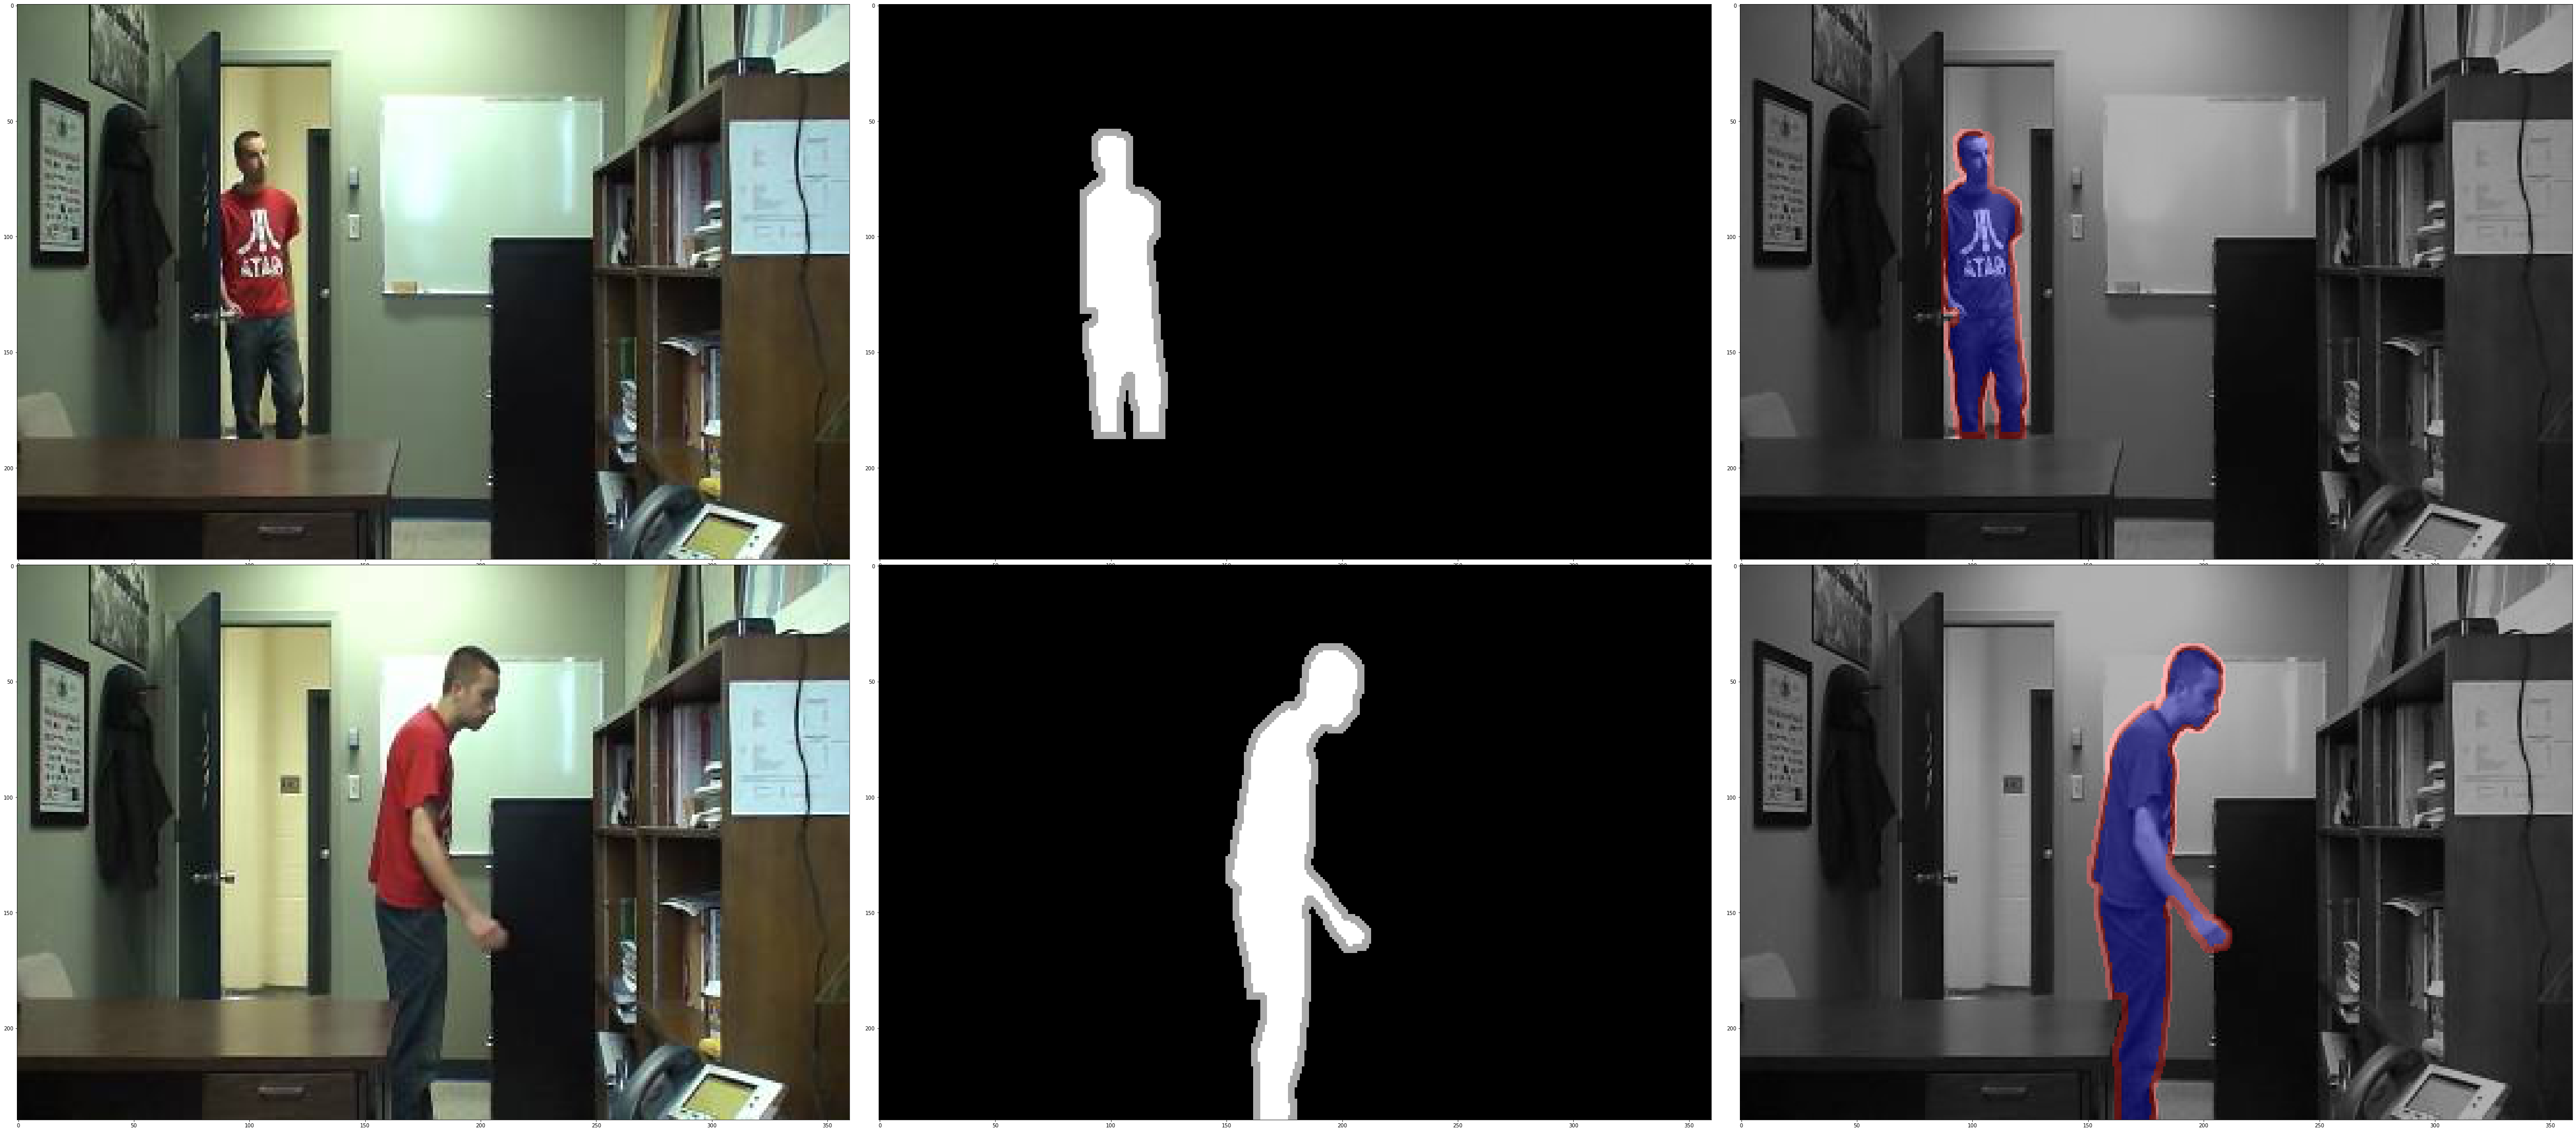

In [6]:
image_sample_1 = office_loader.load_image(0)
gt_sample_1 = office_loader.load_annotation(0)

image_sample_5 = office_loader.load_image(5)
gt_sample_5 = office_loader.load_annotation(5)

info(image_sample_1, "image_sample")
info(gt_sample_1, "gt_sample")

show_all(2, 3, image_sample_1, gt_sample_1, visuals.overlay(image_sample_1, gt_sample_1),
               image_sample_5, gt_sample_5, visuals.overlay(image_sample_5, gt_sample_5));

## Foreground finder

In [59]:
import see.foreground.backgrounds as backgrounds
import see.foreground as foregrounds
importlib.reload(backgrounds)
importlib.reload(foregrounds)
static_background = backgrounds.StaticBackgroundModel(update_inertia=4.0, error_inertia=4.5, diff_method='rgb')
finder = foregrounds.ForegroundFinder(static_background, cleaning={'method': 'median', 'size': 5}, confident_size=3)

### Processing

In [60]:
def update_for_frame(model, nr):
    image_sample = office_loader.load_image(nr)
    gt_sample = office_loader.load_annotation(nr)
    foreground_mask = gt_sample != 0
    model.update(image_sample, foreground_mask)

update_for_frame(finder, 0)

 <class 'numpy.ndarray'>
Shape: (240, 360), Type: float64, Min-max: (0.0, 1.0), Mean: 0.6570843942901236


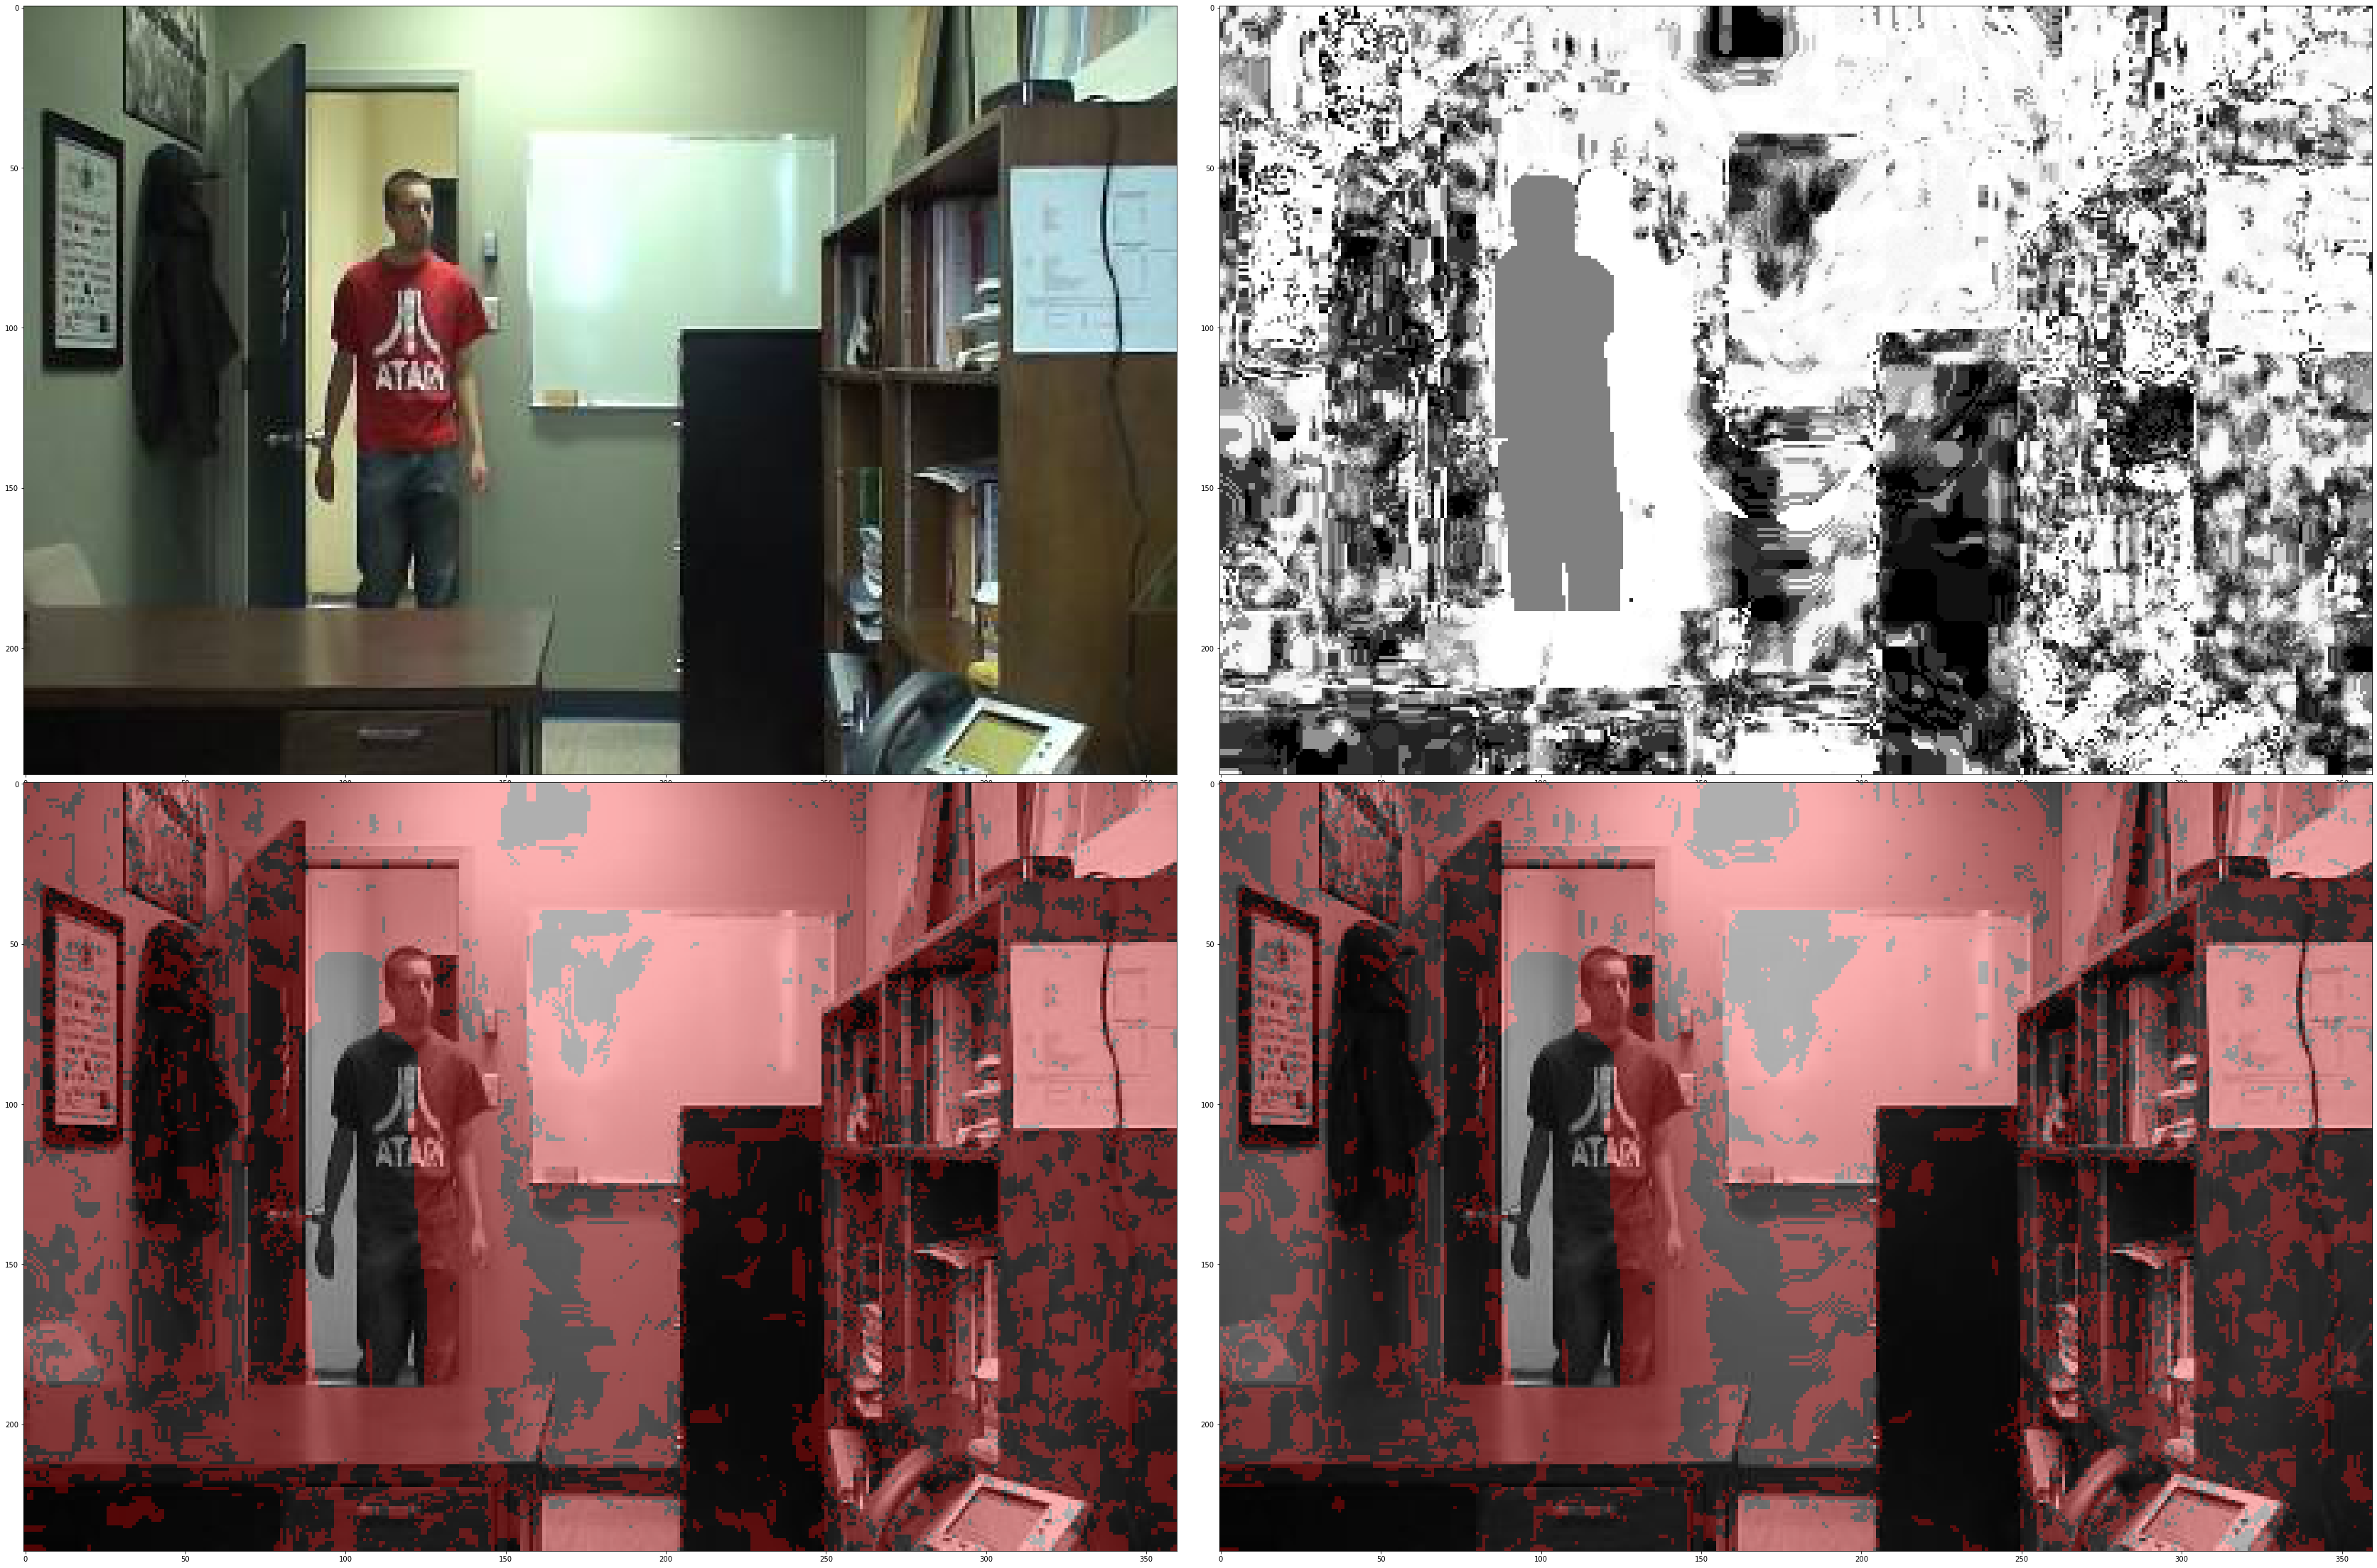

In [61]:
def show_model_for_frame(model, nr):
    image_sample = office_loader.load_image(nr)
    probs = model.calc_prob(image_sample)
    info(probs)
    foreground = probs > 0.5
    foreground_sure = probs > 0.8
    
    foreground_overlay = visuals.overlay(image_sample, foreground)
    foreground_sure_overlay = visuals.overlay(image_sample, foreground_sure)
    
    show_all(2, 2, image_sample, probs, foreground_overlay, foreground_sure_overlay)
    
show_model_for_frame(finder, 1)

 <class 'numpy.ndarray'>
Shape: (240, 360), Type: float64, Min-max: (0.0, 1.0), Mean: 0.5451677020831411


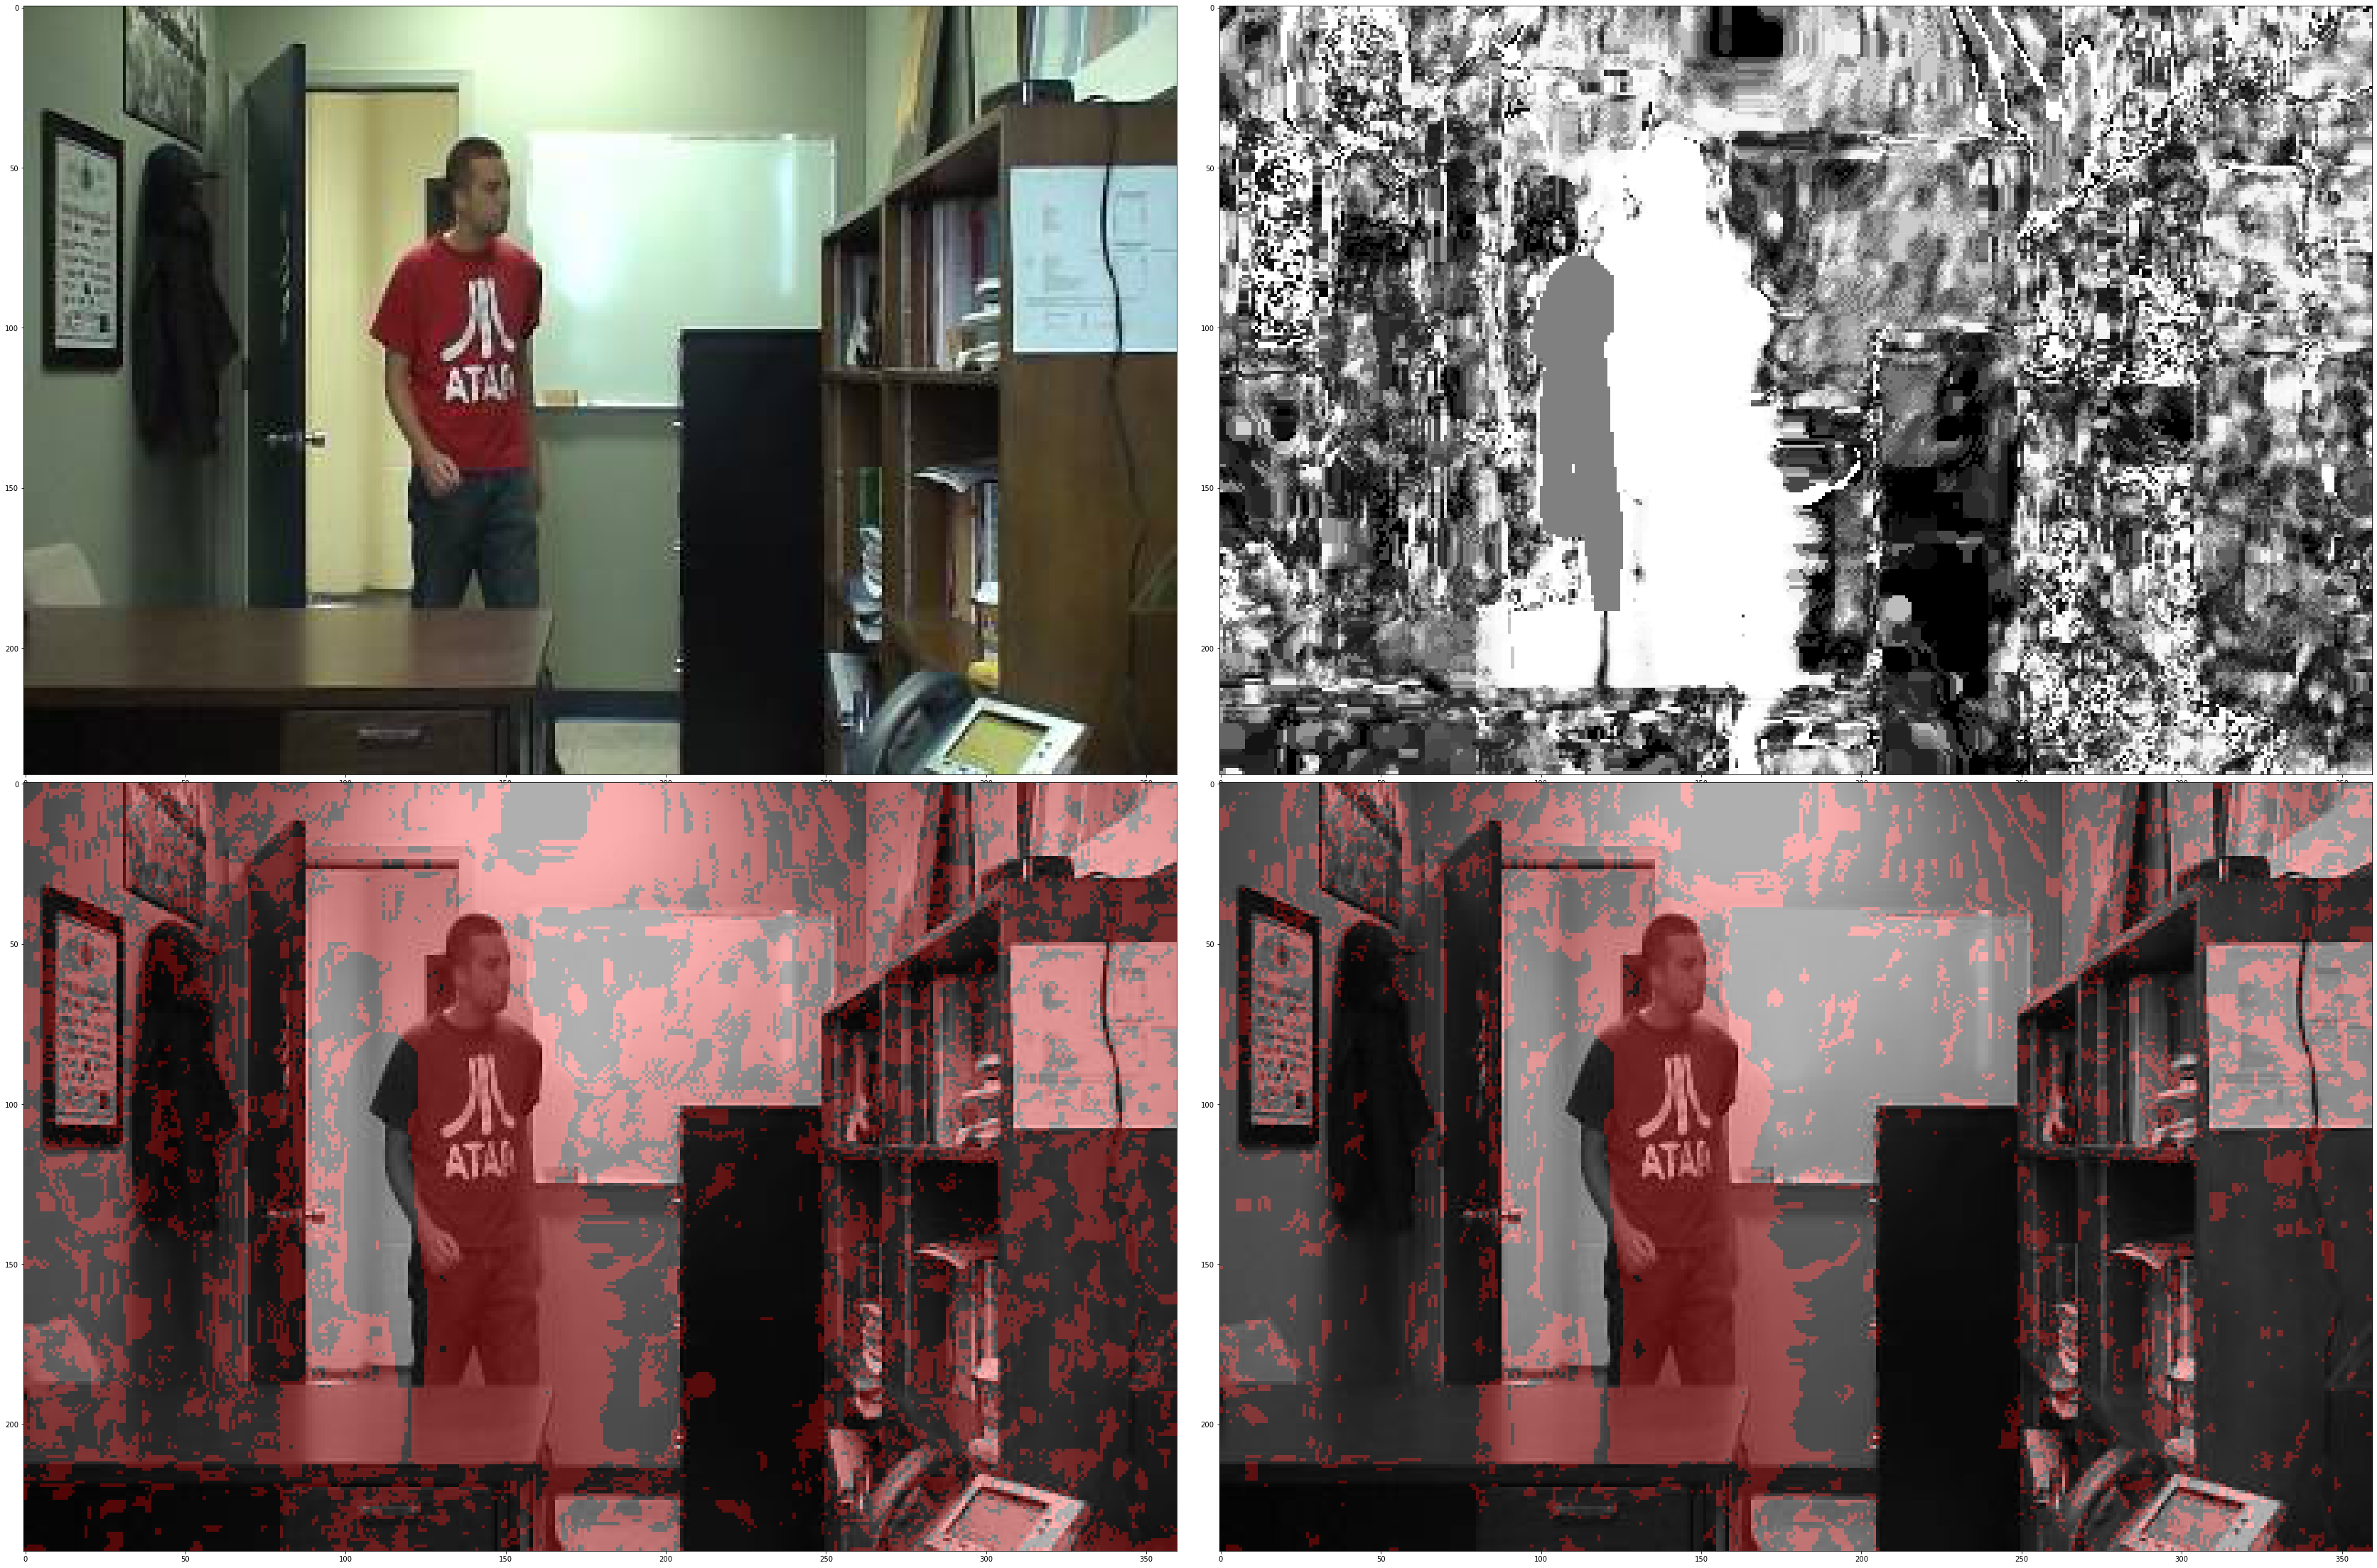

In [62]:
update_for_frame(finder, 2)
show_model_for_frame(finder, 3)

 <class 'numpy.ndarray'>
Shape: (240, 360), Type: float64, Min-max: (0.0, 1.0), Mean: 0.8246241594294236


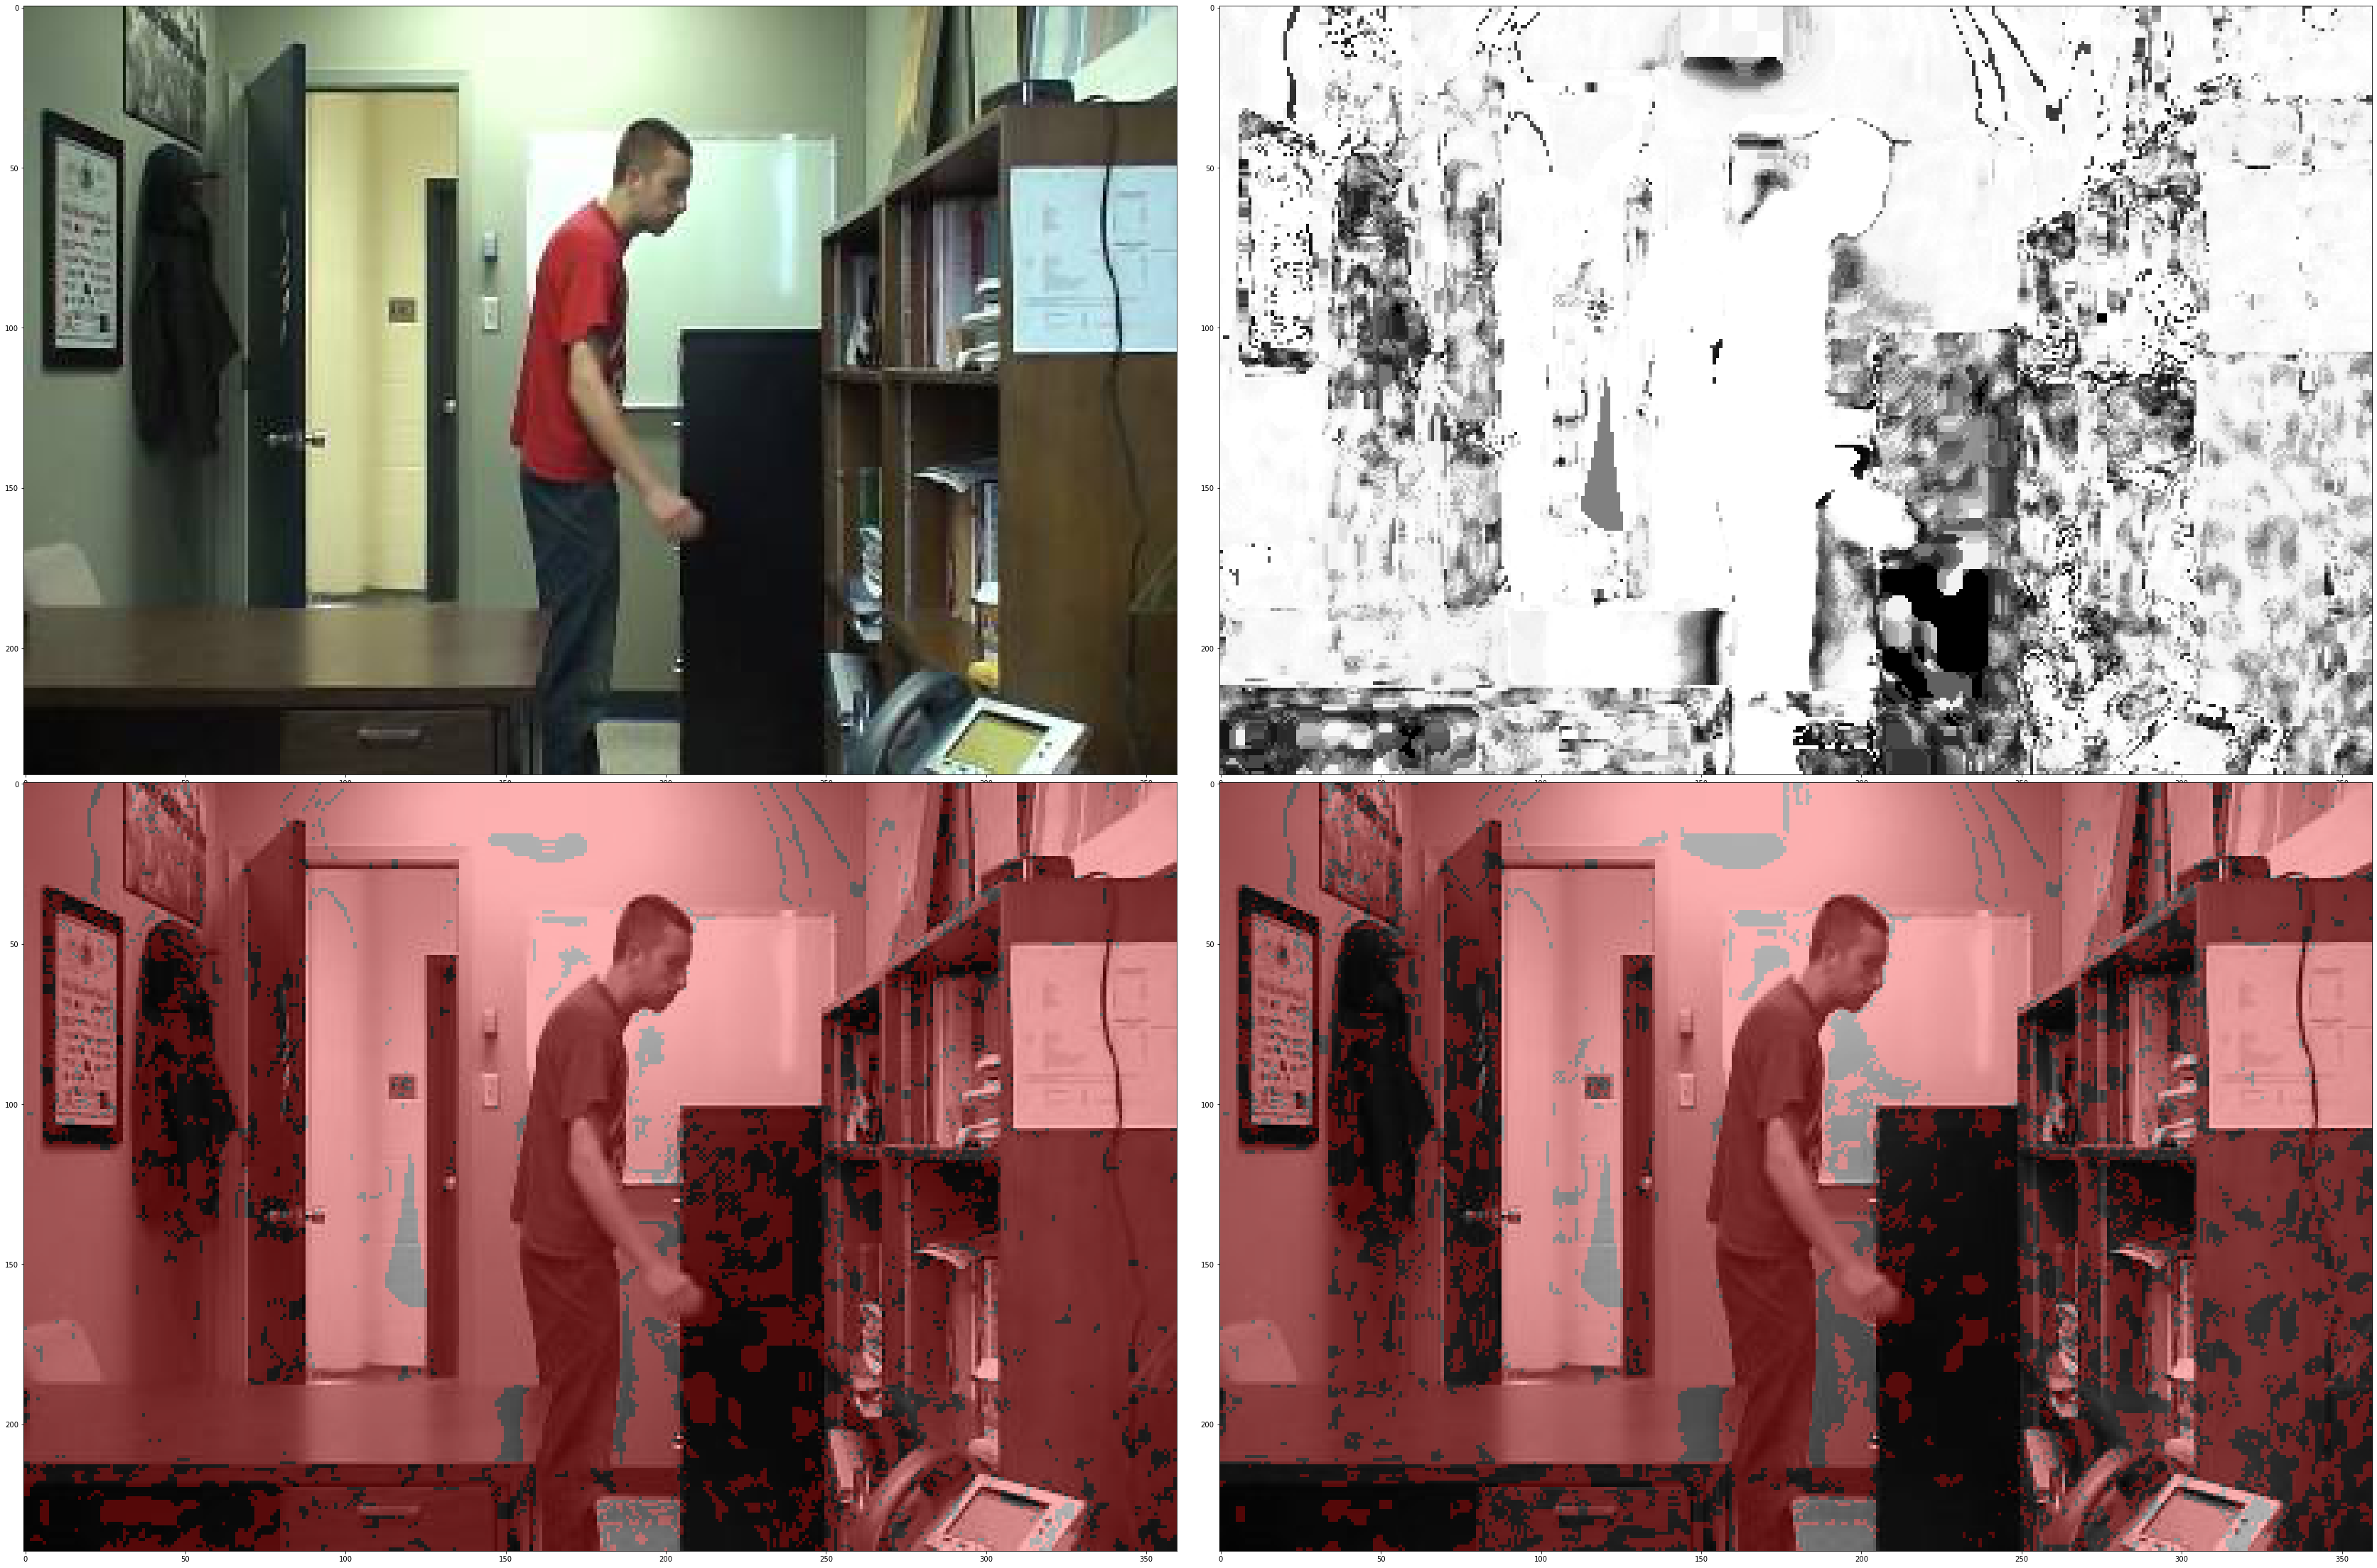

In [63]:
update_for_frame(finder, 4)
show_model_for_frame(finder, 5)

 <class 'numpy.ndarray'>
Shape: (240, 360), Type: float64, Min-max: (0.0, 1.0), Mean: 0.9176481963345596


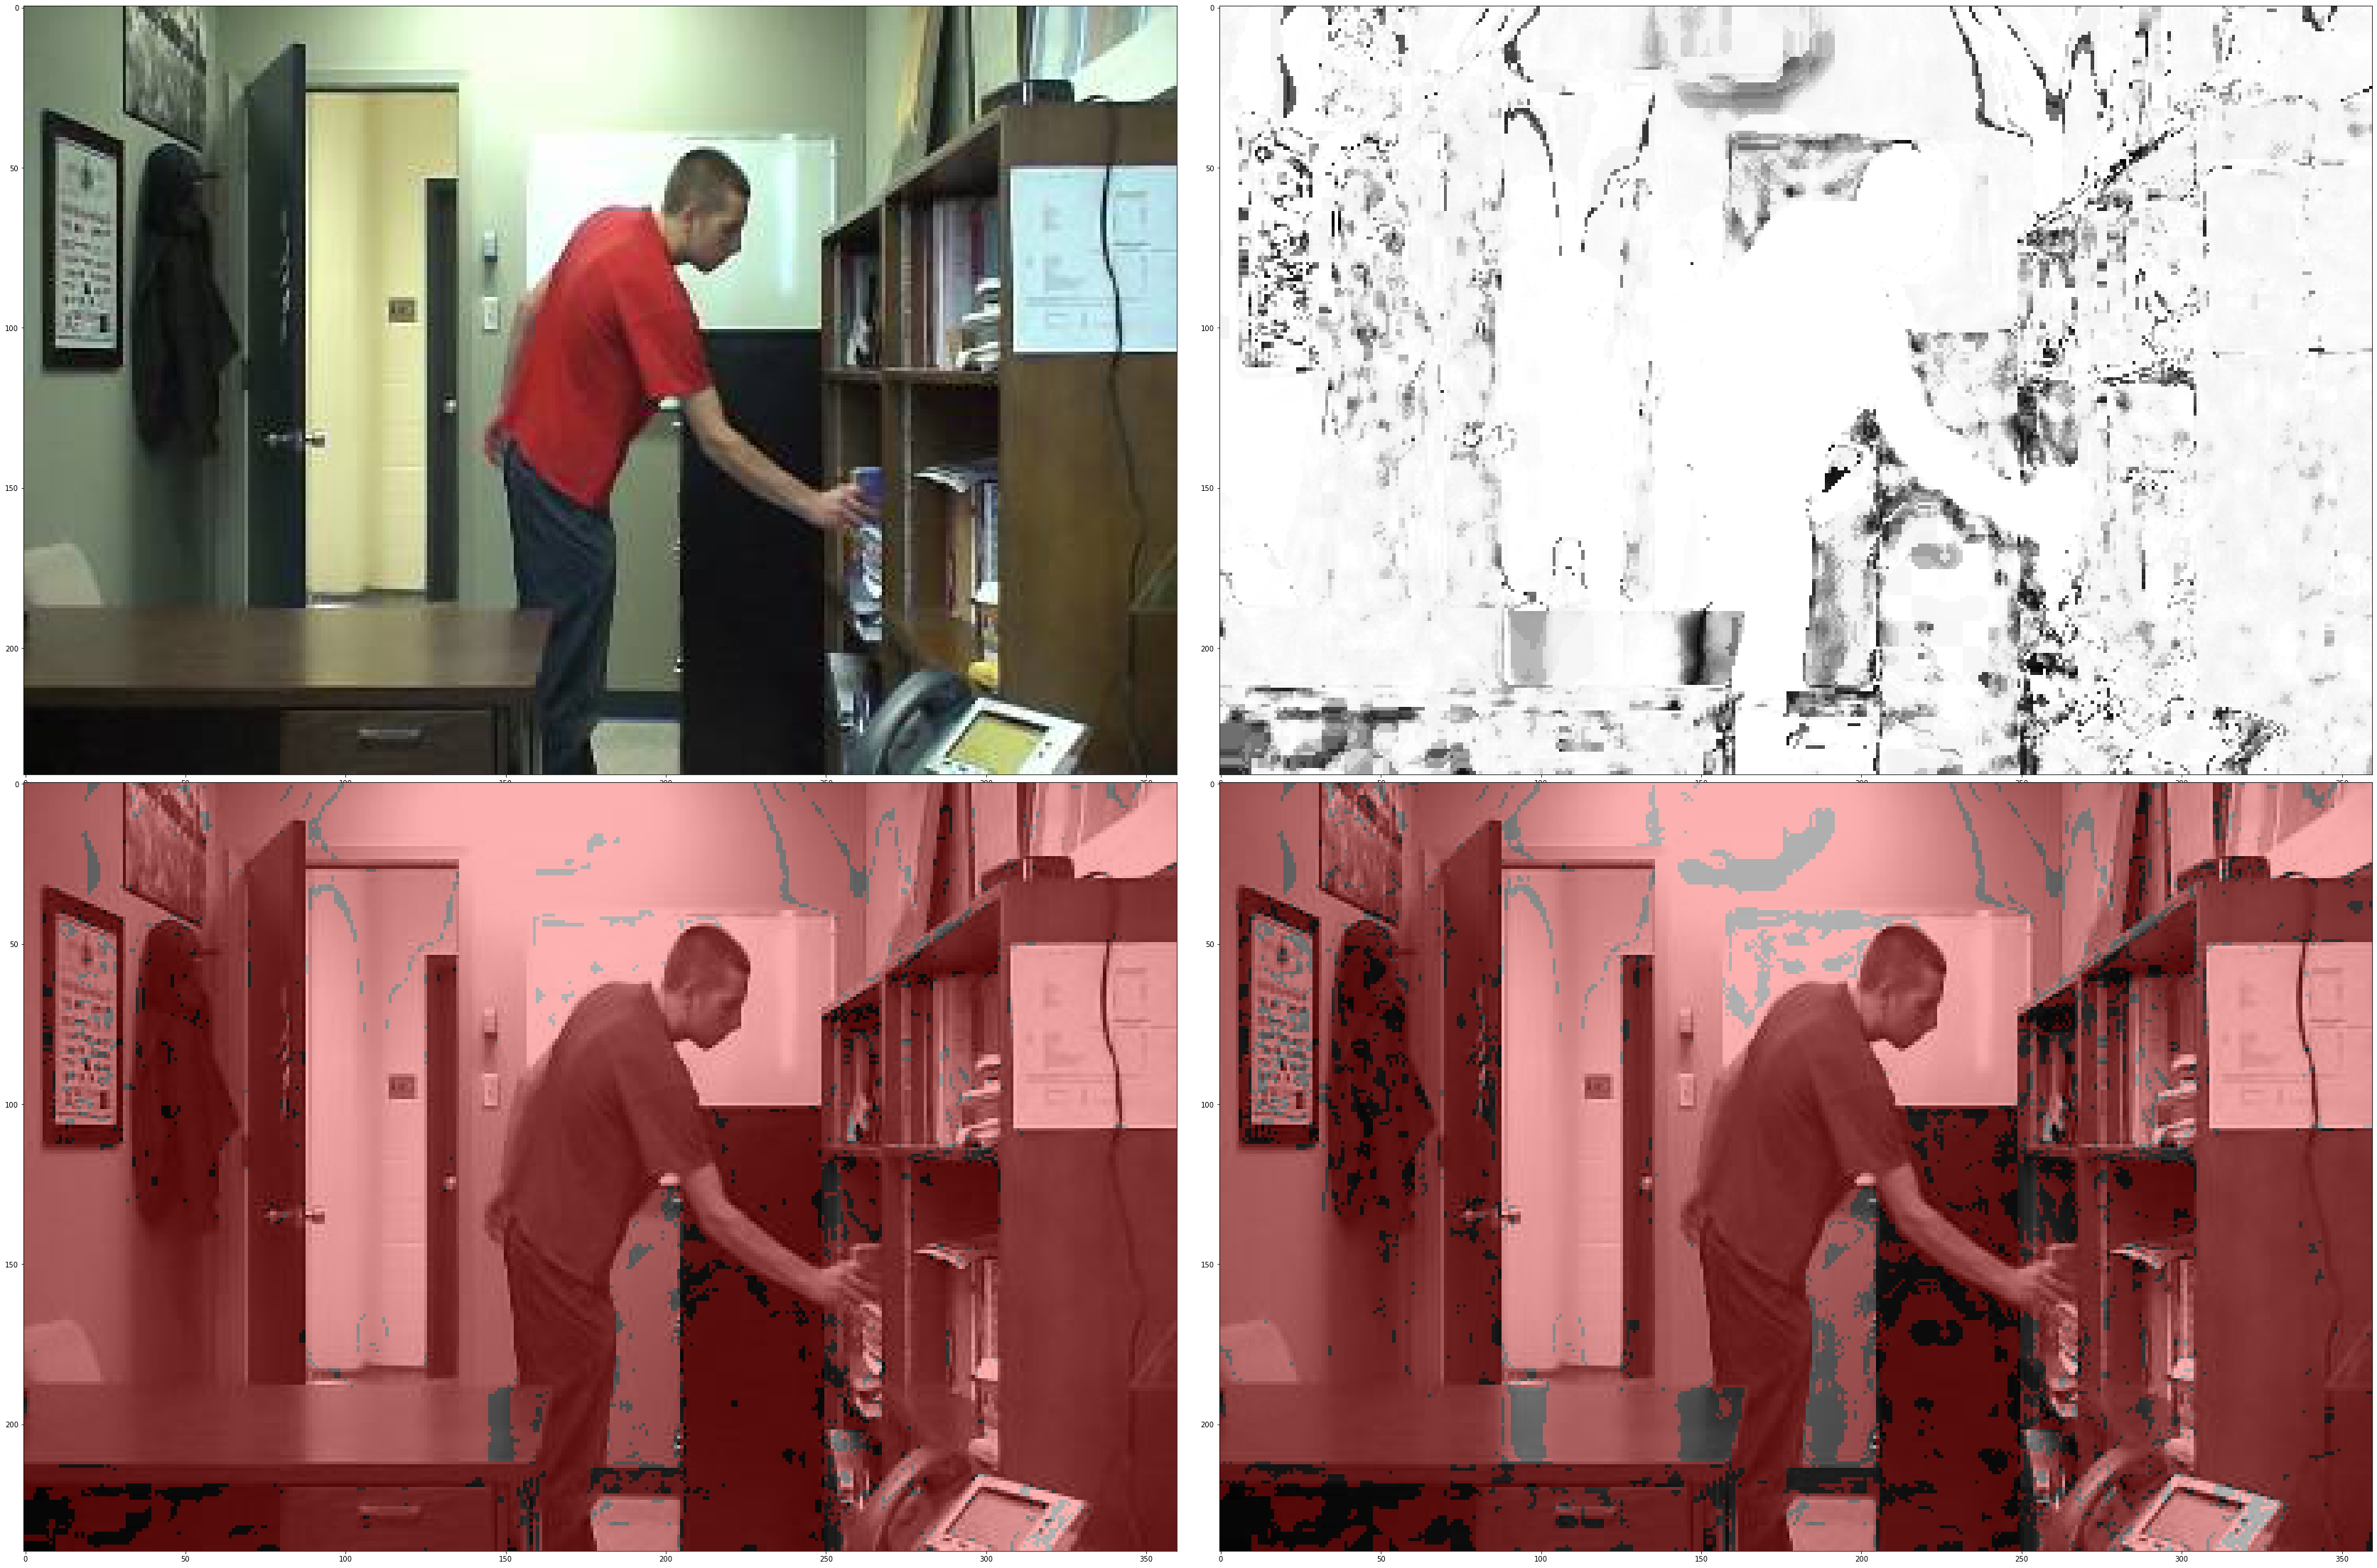

In [64]:
update_for_frame(finder, 6)
show_model_for_frame(finder, 7)

 <class 'numpy.ndarray'>
Shape: (240, 360), Type: float64, Min-max: (0.0, 1.0), Mean: 0.5507452100966831


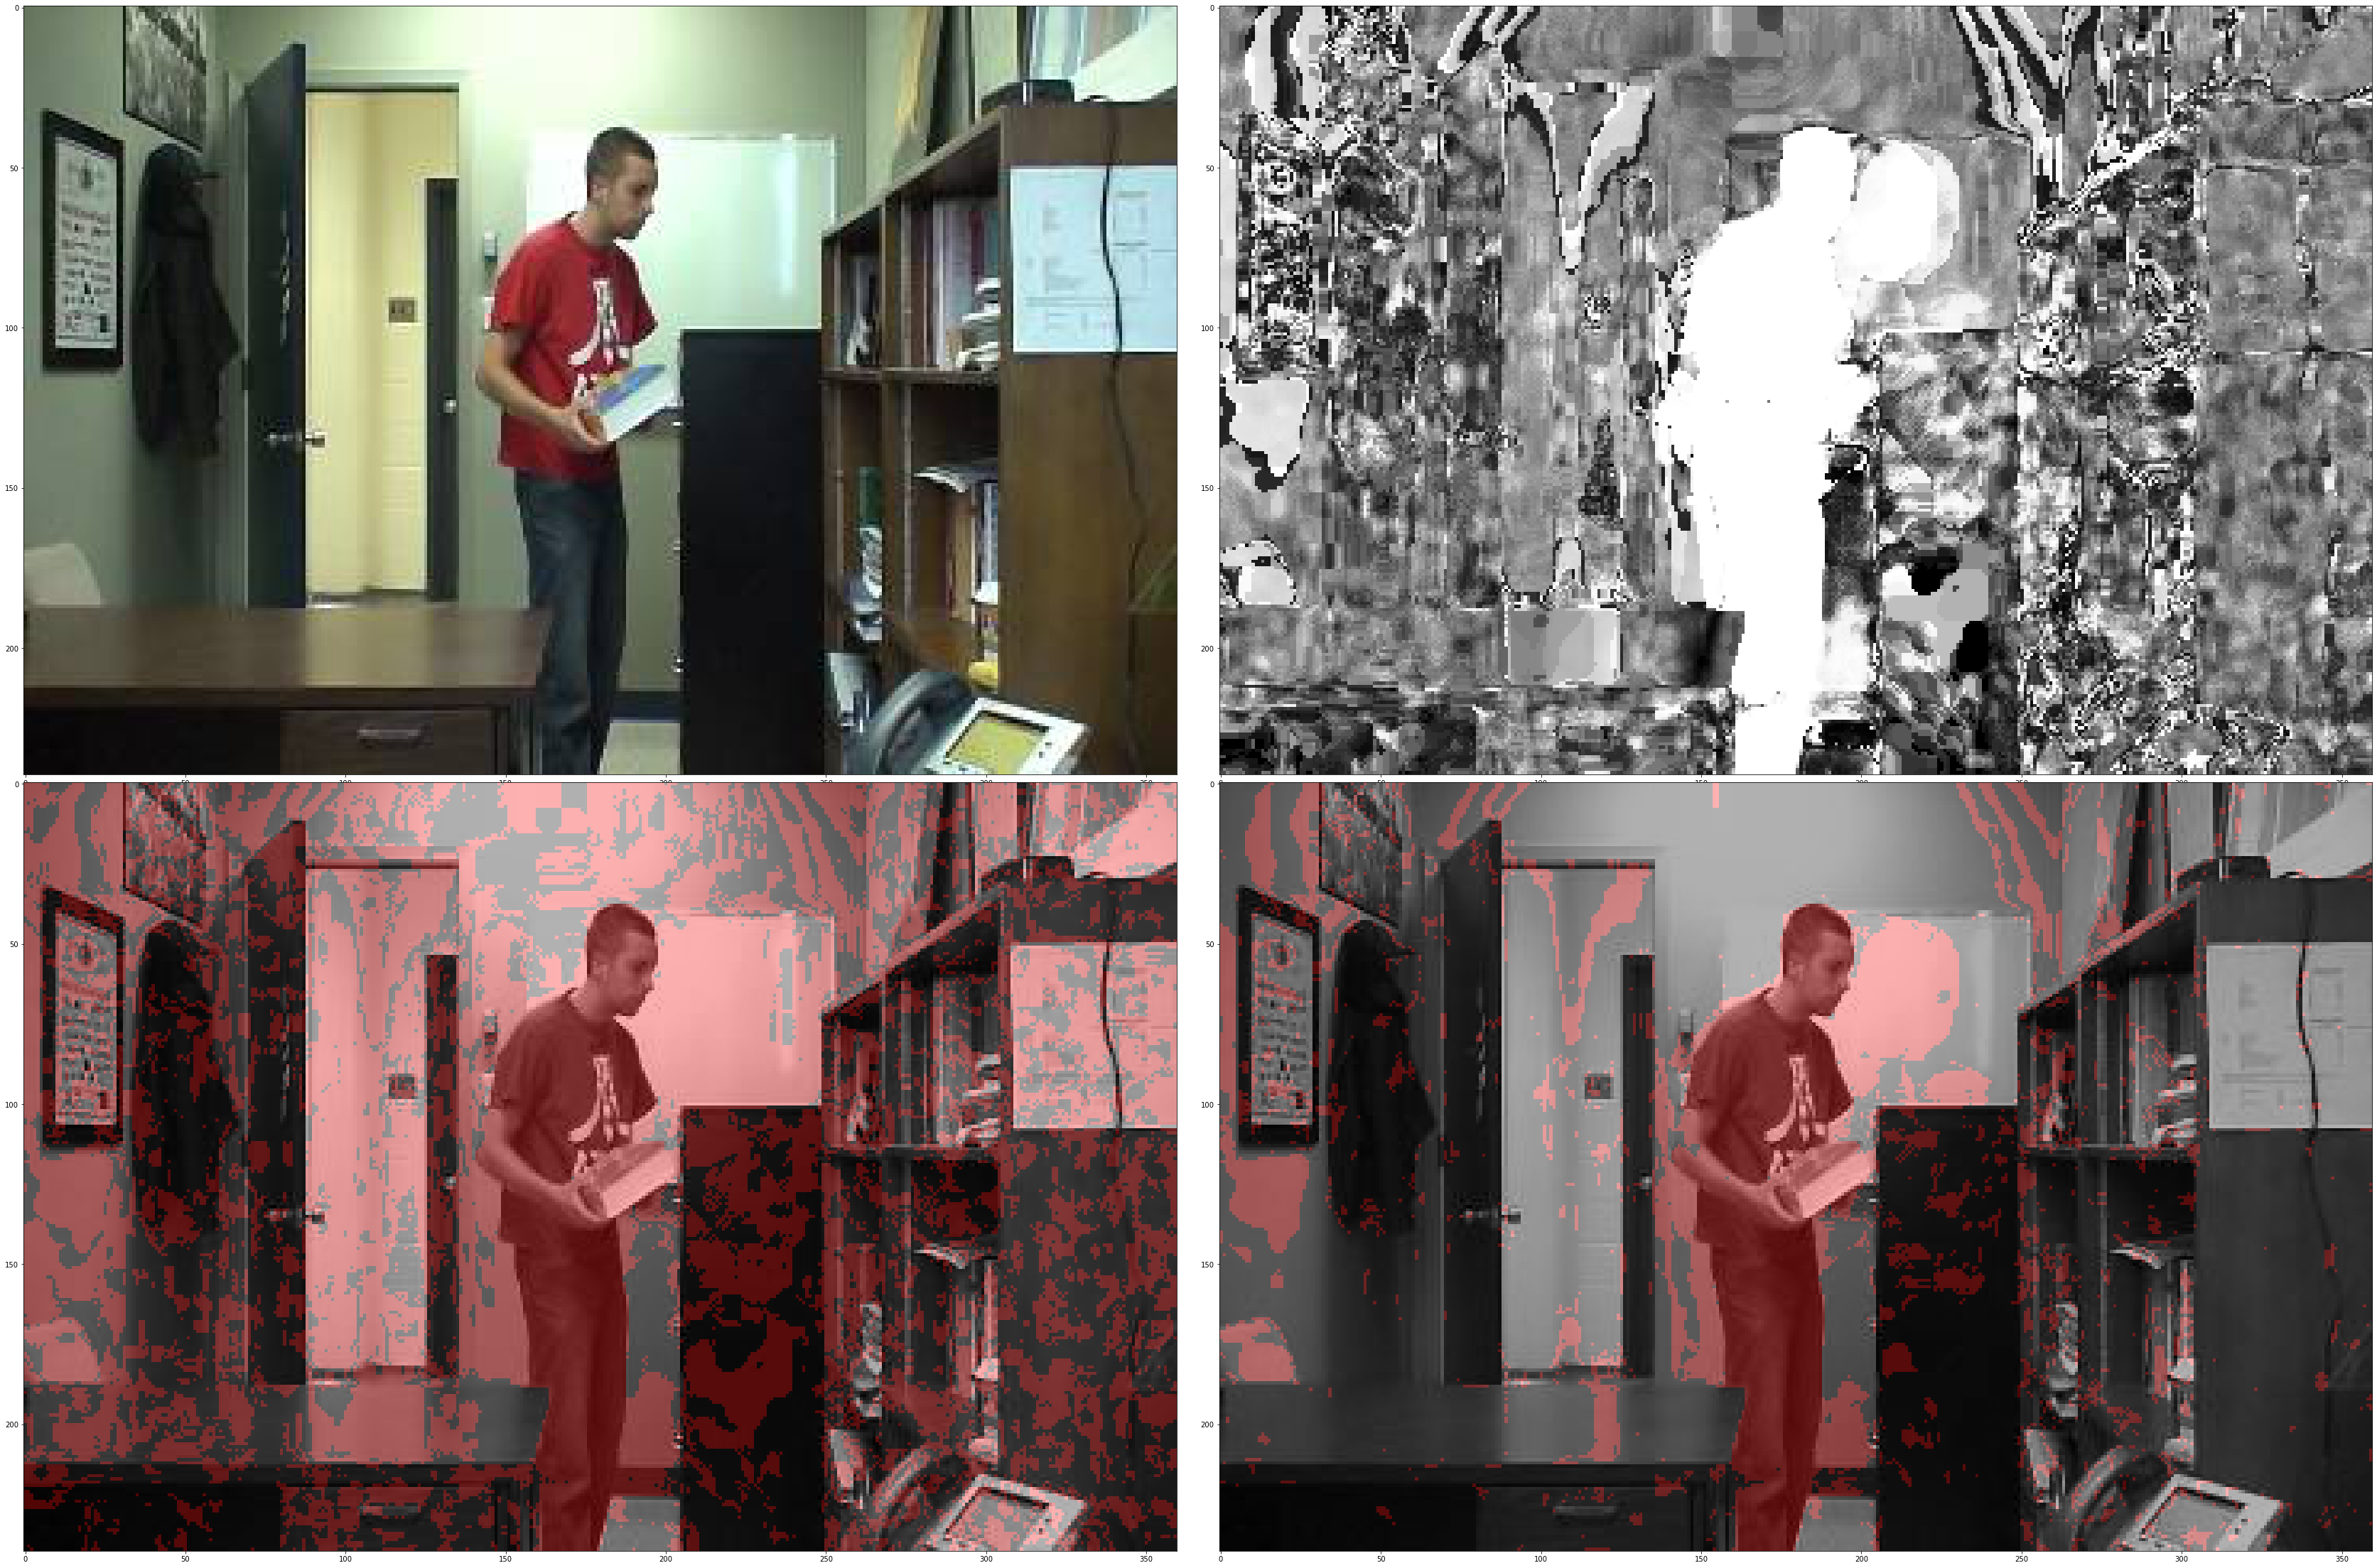

In [65]:
update_for_frame(finder, 8)
show_model_for_frame(finder, 9)

 <class 'numpy.ndarray'>
Shape: (240, 360), Type: float64, Min-max: (0.0, 1.0), Mean: 0.42526768124584197


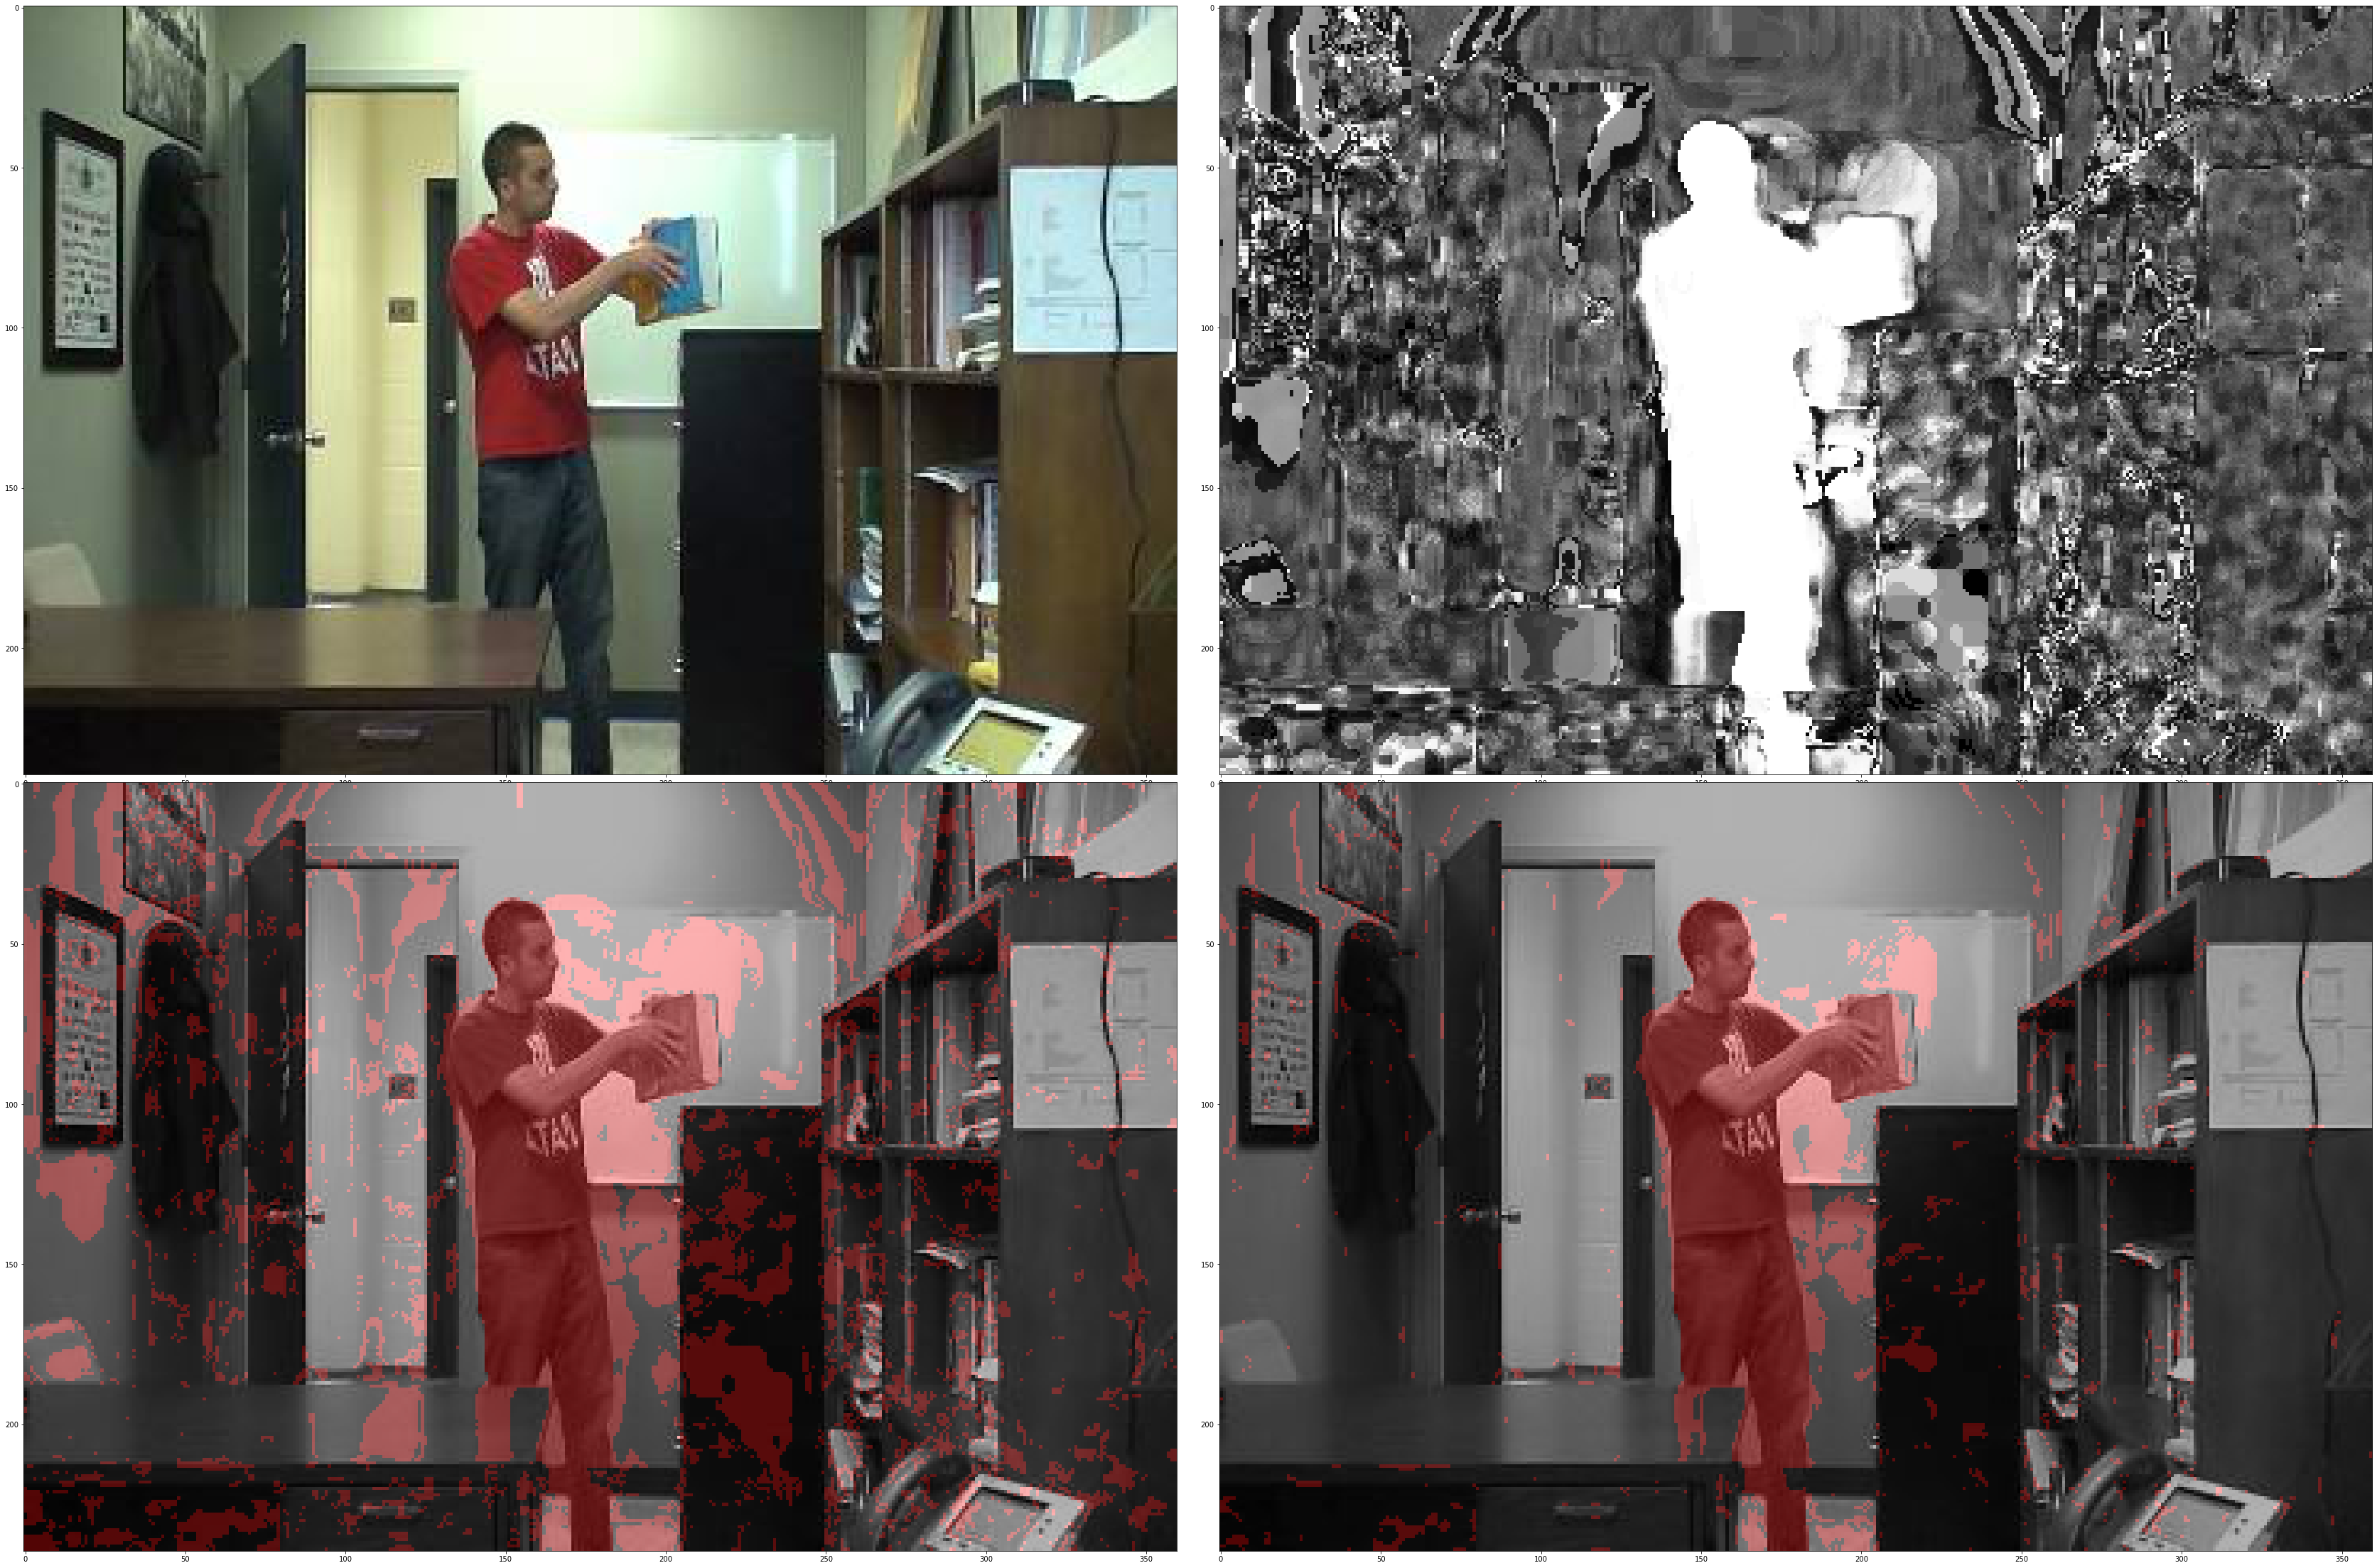

In [66]:
update_for_frame(finder, 10)
show_model_for_frame(finder, 11)